In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import xarray as xr

from salishsea_tools import viz_tools

In [2]:
watercolor = 'lightskyblue'
landcolour = 'papayawhip'

In [3]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
tmask = 1- mesh.tmask[0, 0]

In [4]:
imin, imax = 520, 720
jmin, jmax = 100, 300
y_slice = np.arange(imin, imax)
x_slice = np.arange(jmin, jmax)

In [43]:
data3d_1 = xr.open_dataset('/data/sallen/results/MIDOSS/Monte_Carlo/first30_beachpresence1.nc')
data3d_3 = xr.open_dataset('/data/sallen/results/MIDOSS/Monte_Carlo/first30_beachpresence3.nc')
data3d_7 = xr.open_dataset('/data/sallen/results/MIDOSS/Monte_Carlo/first30_beachpresence7.nc')

In [44]:
oilbeach1 = np.ma.masked_array(data3d_1.oilbeach, data3d_1.oilbeach < 0.01)
oilbeach3 = np.ma.masked_array(data3d_3.oilbeach, data3d_3.oilbeach < 0.01)
oilbeach7 = np.ma.masked_array(data3d_7.oilbeach, data3d_7.oilbeach < 0.01)


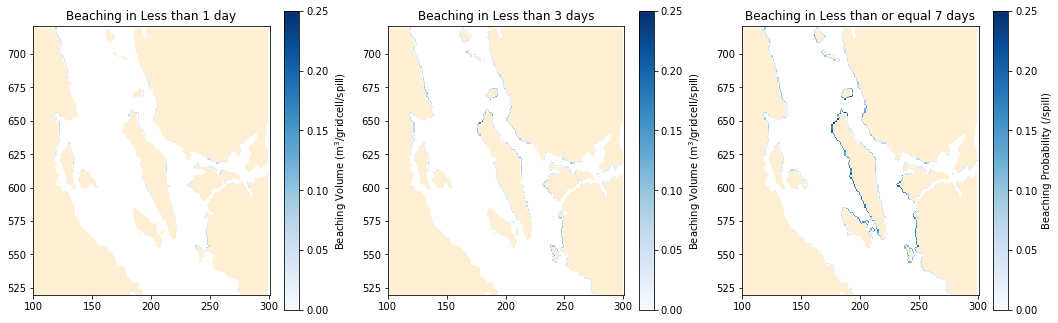

In [50]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5.5))
for ax in axs:
    viz_tools.plot_land_mask(ax, '/home/sallen/MEOPAR/grid/bathymetry_201702.nc', 
                         xslice=x_slice, yslice=y_slice, color=landcolour)
    viz_tools.set_aspect(ax);
    
colours = axs[0].pcolormesh(np.arange(jmin,jmax+1)+0.75, np.arange(imin,imax+1)+0.75, oilbeach1[imin:imax , jmin:jmax], cmap='Blues', vmax=0.25, vmin=0);
cb = fig.colorbar(colours, ax=axs[0])
cb.set_label('Beaching Volume (m$^3$/gridcell/spill)')
axs[0].set_title("Beaching in Less than 1 day")

colours = axs[1].pcolormesh(np.arange(jmin,jmax+1)+0.75, np.arange(imin,imax+1)+0.75, oilbeach3[imin:imax , jmin:jmax], cmap='Blues', vmax=0.25, vmin=0);
cb = fig.colorbar(colours, ax=axs[1])
cb.set_label('Beaching Volume (m$^3$/gridcell/spill)')
axs[1].set_title("Beaching in Less than 3 days")

colours = axs[2].pcolormesh(np.arange(jmin,jmax+1)+0.75, np.arange(imin,imax+1)+0.75,  oilbeach7[imin:imax , jmin:jmax], cmap='Blues', vmax=0.25, vmin=0);
cb = fig.colorbar(colours, ax=axs[2])
cb.set_label('Beaching Probability (/spill)')
axs[2].set_title("Beaching in Less than or equal 7 days")

fig.savefig('BeachingPresence_for_30.png')

In [27]:
diffy.min()

<xarray.DataArray 'oilbeach' ()>
array(0.)